# **Heart Disease Prediction Model**

**This prediction model predict that a person has heart disease or not based on their Age, Sex and Health condition**

### **Import Python Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Dataset**

In [ ]:
dataset = pd.read_csv("hf://datasets/muhrafli/heart-diseases/heart (3).csv")
dataset.head()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Dataset has 918 rows and 12 columns**

In [ ]:
dataset.shape

(918, 12)

**We can see in the graph that here is no null values in each variable**

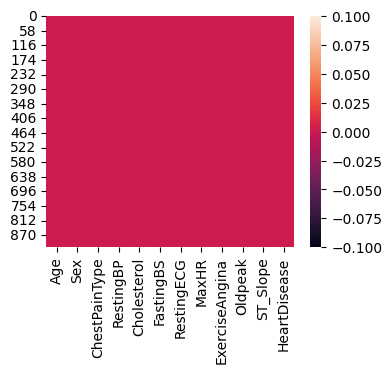

In [ ]:
plt.figure(figsize = (4, 3))
sns.heatmap(dataset.isnull())
plt.show()

### **Outliers**

**In dataset variables, some variables has low amount of outliers no anyone has a lot of outliers so I'll remain it.**

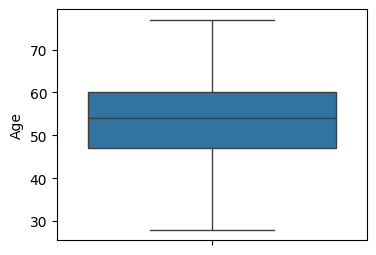

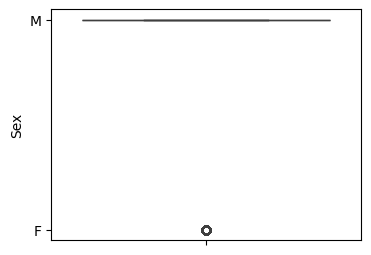

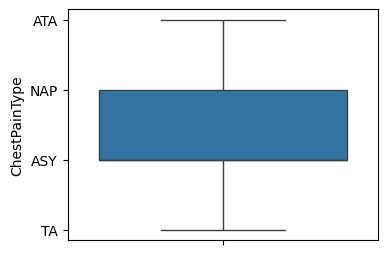

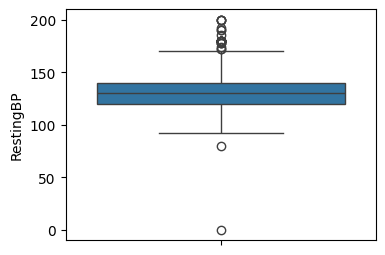

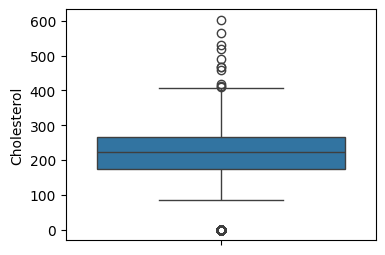

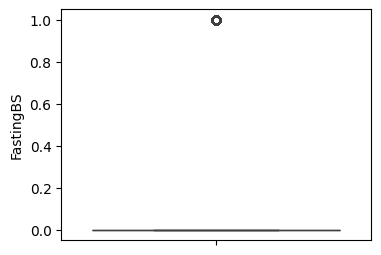

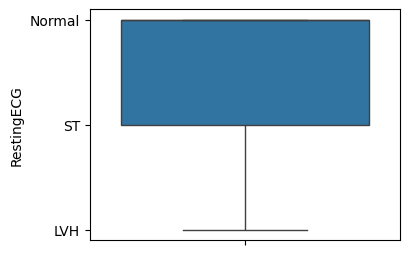

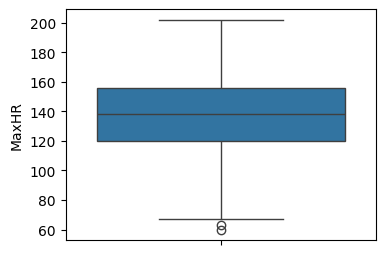

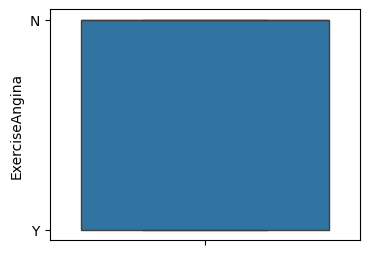

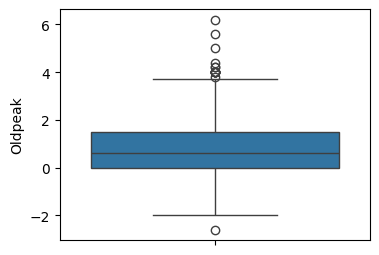

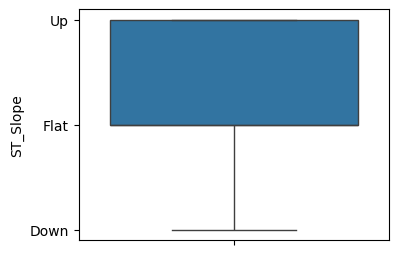

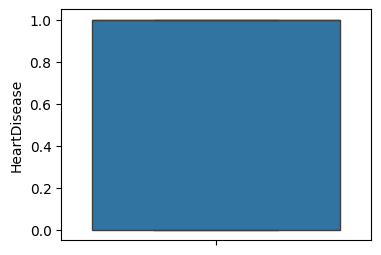

In [ ]:
for i in dataset.columns:
  plt.figure(figsize = (4, 3))
  sns.boxplot(dataset[i])
  plt.show()

### **Encoding**

**Encoding means covert categorical features to numerical features because Machine Learning train on numerical data not categorical data**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encode = OrdinalEncoder()

In [ ]:
for i in dataset.select_dtypes(include = "object").columns:
    encode.fit(dataset[[i]])
    dataset[i] = encode.transform(dataset[[i]])

In [ ]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0,0


### **Scalling**

**In scalling, we convert large number or amount of variables into low number or amount**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(dataset[["Age"]])
dataset["Age"] = scaler.transform(dataset[["Age"]])

In [ ]:
scaler.fit(dataset[["RestingBP"]])
dataset["RestingBP"] = scaler.transform(dataset[["RestingBP"]])

In [ ]:
scaler.fit(dataset[["Cholesterol"]])
dataset["Cholesterol"] = scaler.transform(dataset[["Cholesterol"]])

In [ ]:
scaler.fit(dataset[["MaxHR"]])
dataset["MaxHR"] = scaler.transform(dataset[["MaxHR"]])

In [ ]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1.0,1.0,0.410909,0.825070,0,1.0,1.382928,0.0,0.0,2.0,0
1,-0.478484,0.0,2.0,1.491752,-0.171961,0,1.0,0.754157,0.0,1.0,1.0,1
2,-1.751359,1.0,1.0,-0.129513,0.770188,0,2.0,-1.525138,0.0,0.0,2.0,0
3,-0.584556,0.0,0.0,0.302825,0.139040,0,1.0,-1.132156,1.0,1.5,1.0,1
4,0.051881,1.0,2.0,0.951331,-0.034755,0,1.0,-0.581981,0.0,0.0,2.0,0


<ipython-input-15-0ac2c6471394>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


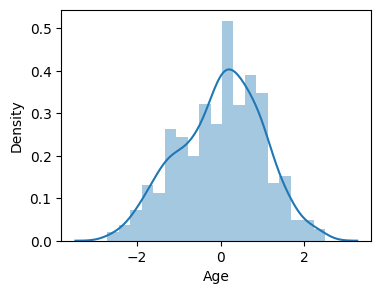

<ipython-input-15-0ac2c6471394>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


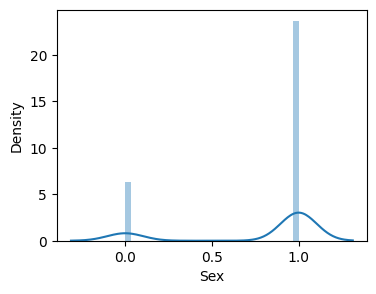

<ipython-input-15-0ac2c6471394>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


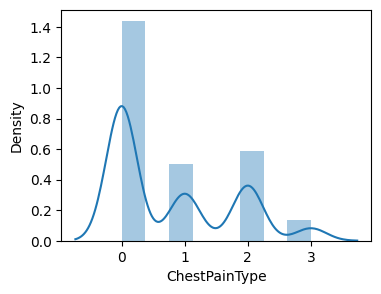

<ipython-input-15-0ac2c6471394>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


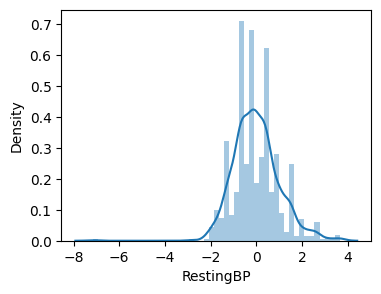

<ipython-input-15-0ac2c6471394>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


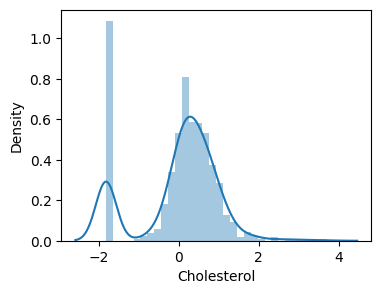

<ipython-input-15-0ac2c6471394>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


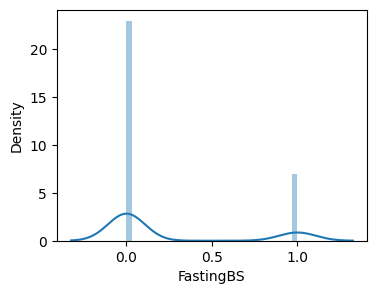

<ipython-input-15-0ac2c6471394>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


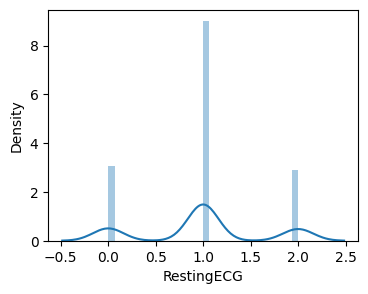

<ipython-input-15-0ac2c6471394>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


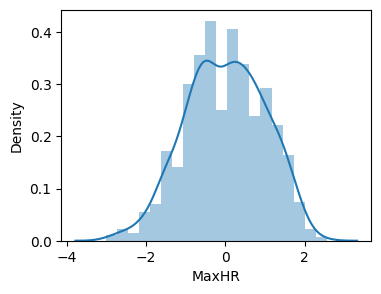

<ipython-input-15-0ac2c6471394>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


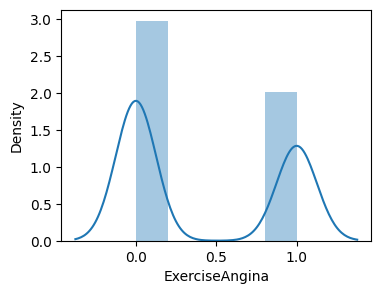

<ipython-input-15-0ac2c6471394>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


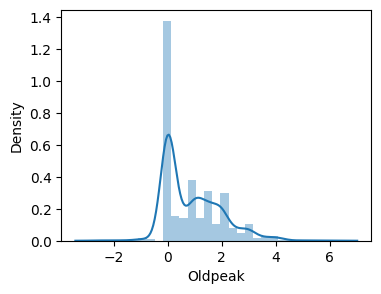

<ipython-input-15-0ac2c6471394>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


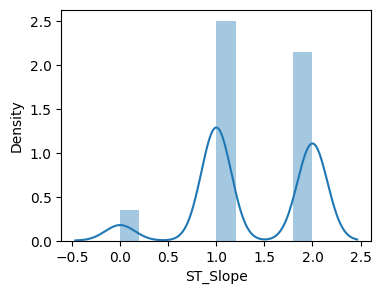

<ipython-input-15-0ac2c6471394>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


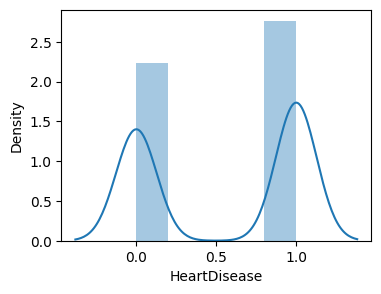

In [ ]:
for i in dataset.columns:
  plt.figure(figsize = (4, 3))
  sns.distplot(dataset[i])
  plt.show()

### **Imbalancing**

**we can see that 1 is coming 508 times and 0 is coming 410 times means they are imbalance and Machine Learning will train bad in this sequence so I'll balance it**

In [ ]:
dataset["HeartDisease"].value_counts()

,count
HeartDisease,
1,508
0,410


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
x_rus, y_rus = rus.fit_resample(dataset.iloc[:, :-1], dataset["HeartDisease"])

### **Splitting**

**Now splitting the dataset into training and testing data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size = 0.2, random_state = 42)

## **Models**

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

**Score of this model means accuracy of this model on training and testing dataset**

In [ ]:
log_model.score(x_train, y_train) * 100, log_model.score(x_test, y_test) * 100

(84.45121951219512, 84.14634146341463)

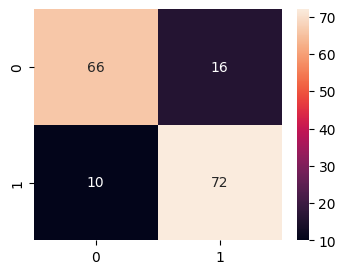

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
log_cm = confusion_matrix(y_test, log_model.predict(x_test))
plt.figure(figsize = (4, 3))
sns.heatmap(log_cm, annot = True)
plt.show()

**Accuracy, Precision, Recall, and f1 score of this model**

In [ ]:
log_acc = accuracy_score(y_test, log_model.predict(x_test))
log_pre = precision_score(y_test, log_model.predict(x_test))
log_re = recall_score(y_test, log_model.predict(x_test))
log_f1 = f1_score(y_test, log_model.predict(x_test))

In [ ]:
log_acc, log_pre, log_re, log_f1

(0.8414634146341463,
 0.8181818181818182,
 0.8780487804878049,
 0.8470588235294118)

### **Decision Tree Classifier Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

**Score of this model means accuracy of this model on training and testing dataset**

In [ ]:
dt_model.score(x_train, y_train) * 100, dt_model.score(x_test, y_test) * 100

(100.0, 80.48780487804879)

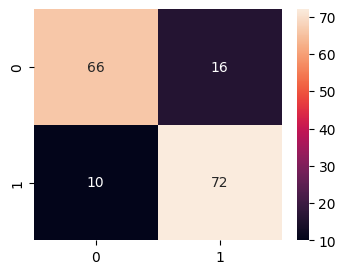

In [ ]:
from sklearn.metrics import confusion_matrix
dt_cm = confusion_matrix(y_test, dt_model.predict(x_test))
plt.figure(figsize = (4, 3))
sns.heatmap(log_cm, annot = True)
plt.show()

**Accuracy, Precision, Recall, and f1 score of this model**

In [ ]:
dt_acc = accuracy_score(y_test, dt_model.predict(x_test))
dt_pre = precision_score(y_test, dt_model.predict(x_test))
dt_re = recall_score(y_test, dt_model.predict(x_test))
dt_f1 = f1_score(y_test, dt_model.predict(x_test))

In [ ]:
dt_acc, dt_pre, dt_re, dt_f1

(0.8048780487804879,
 0.7976190476190477,
 0.8170731707317073,
 0.8072289156626506)

**K Neighbors Classification Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

**Score of this model means accuracy of this model on training and testing dataset**

In [ ]:
knn_model.score(x_train, y_train) * 100, knn_model.score(x_test, y_test) * 100

(86.58536585365853, 89.02439024390245)

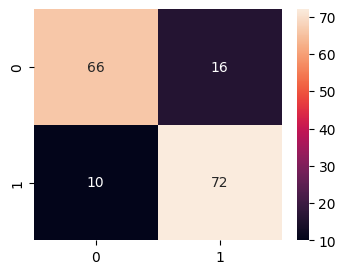

In [ ]:
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, knn_model.predict(x_test))
plt.figure(figsize = (4, 3))
sns.heatmap(log_cm, annot = True)
plt.show()

**Accuracy, Precision, Recall, and f1 score of this model**

In [ ]:
knn_acc = accuracy_score(y_test, knn_model.predict(x_test))
knn_pre = precision_score(y_test, knn_model.predict(x_test))
knn_re = recall_score(y_test, knn_model.predict(x_test))
knn_f1 = f1_score(y_test, knn_model.predict(x_test))

In [ ]:
knn_acc, knn_pre, knn_re, knn_f1

(0.8902439024390244, 0.872093023255814, 0.9146341463414634, 0.8928571428571429)

### **Support Vector Classification Model**

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(x_train, y_train)

SVC()

**Score of this model means accuracy of this model on training and testing dataset**

In [ ]:
svm_model.score(x_train, y_train) * 100, svm_model.score(x_test, y_test) * 100

(90.2439024390244, 88.41463414634147)

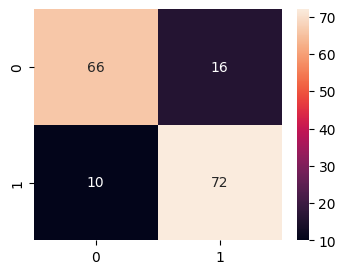

In [ ]:
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test, svm_model.predict(x_test))
plt.figure(figsize = (4, 3))
sns.heatmap(log_cm, annot = True)
plt.show()

**Accuracy, Precision, Recall, and f1 score of this model**

In [ ]:
svm_acc = accuracy_score(y_test, svm_model.predict(x_test))
svm_pre = precision_score(y_test, svm_model.predict(x_test))
svm_re = recall_score(y_test, svm_model.predict(x_test))
svm_f1 = f1_score(y_test, svm_model.predict(x_test))

In [ ]:
svm_acc, svm_pre, svm_re, svm_f1

(0.8841463414634146,
 0.8620689655172413,
 0.9146341463414634,
 0.8875739644970414)